In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline
import seaborn as sns


In [25]:
!pip install openpyxl

^C


In [2]:
import openpyxl
print("openpyxl is installed successfully!")

openpyxl is installed successfully!


In [3]:
df = pd.read_excel('task2.xlsx', engine='openpyxl')

In [4]:
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
df.head(3) 

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,PLANT,BUILD_COUNTRY,LAST_KNOWN_DLR_NAME,LAST_KNOWN_DLR_CITY,REPAIRING_DEALER_CODE,DEALER_NAME,REPAIR_DLR_CITY,STATE,DEALER_REGION,REPAIR_DLR_POSTAL_CD,REPAIR_AGE,KM,COMPLAINT_CD_CSI,COMPLAINT_CD,VEH_TEST_GRP,COUNTRY_SALE_ISO,ORD_SELLING_SRC_CD,OPTN_FAMLY_CERTIFICATION,OPTF_FAMLY_EMISSIOF_SYSTEM,GLOBAL_LABOR_CODE,TRANSACTION_CATEGORY,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,ENGINE,ENGINE_DESC,TRANSMISSION,TRANSMISSION_DESC,ENGINE_SOURCE_PLANT,ENGINE_TRACE_NBR,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,MX,Silverstone Motors,ST JOHNS,13-13992/309484,Apex Auto Sales,ST JOHNS,MI,1.0,488799101.0,6.0,8872.0,0.0,0-0310,T03.0354,US,13.0,FE9,FTB,130.0,FREG,NaN,370.03,370.03,61.46,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511.0,V2210281MFTX0488,287827.0,S2210121CNJX0941,2.808908e+09,6.0,1.0,N,CF10543,1500.0,21.0,0.0,1.0
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,Elite Auto Group,FISHERS,13-14819/243038,SilverPeak Motors,GRAND RAPIDS,MN,1.0,557444215.0,5.0,16346.0,0.0,0-0310,T03.0354,US,48.0,FE9,FTB,2400.0,FREG,NaN,307.32,307.32,291.14,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT...",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511.0,V2210291MFTX0188,17749294.0,R2210881CNJX0287,2.808842e+09,6.0,1.0,Y,TF10543,1500.0,10.0,0.0,1.0
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,SHT,US,CrossRoads Dealership,SAN DIEGO,11-46466/119152,Quantum Car Traders,SAN DIEGO,CA,1.0,921083521.0,9.0,8887.0,0.0,0-0310,T00.0006,US,12.0,YF5,FF6,130.0,FREG,NaN,2457.45,3205.45,1012.67,EN0,NONE,MF1,NONE,NaN,NaN,NaN,NaN,2.809979e+09,4.0,1.0,Y,6MB26,Lux-1,10.0,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [6]:
df['DAY_NAME'] = df['REPAIR_DATE'].dt.day_name()


<AxesSubplot:xlabel='DAY_NAME', ylabel='TOTALCOST'>

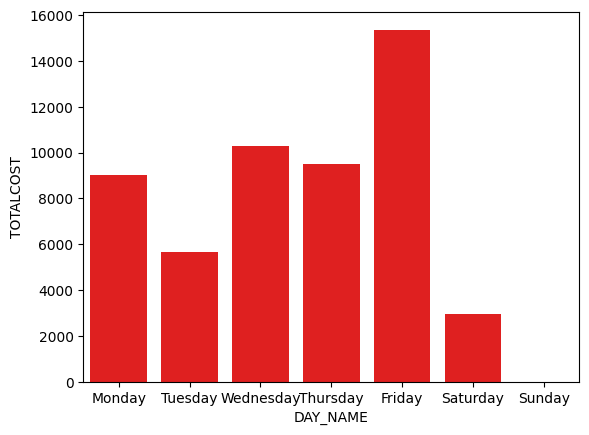

In [7]:
#Total Cost Day Wise
df_daywise=df.groupby(['DAY_NAME'], as_index=False)['TOTALCOST'].sum().sort_values(by='TOTALCOST', ascending=False)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_daywise['DAY_NAME'] = pd.Categorical(df_daywise['DAY_NAME'], categories=weekday_order, ordered=True)

# Sort dataframe based on correct order
df_daywise = df_daywise.sort_values('DAY_NAME')
sns.barplot(x='DAY_NAME', y='TOTALCOST', data=df_daywise, palette=['red'])

([<matplotlib.patches.Wedge at 0x1c018cee9c8>,
 [Text(-0.043947279980332356, 1.099121756941573, 'Full-Size Trucks'),
  Text(-0.8849280035581012, -0.6533777073934137, 'BEV'),
  Text(0.07200380165934092, -1.0976408577246943, 'Full-Size Utility'),
  Text(0.7762047314134455, -0.7794268502761379, 'Global Crossover Vehicles'),
  Text(1.0638892907360933, -0.2795345722036048, 'Global Gamma')])

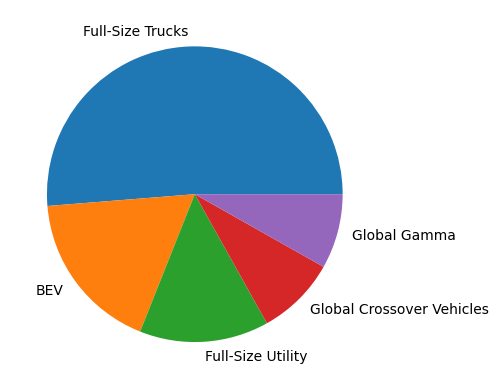

In [24]:
#Top 5 Platforms by TotalCost
df_platform=df.groupby(['PLATFORM'], as_index=False)['TOTALCOST'].sum().sort_values(by='TOTALCOST', ascending=False).head(5)
plt.pie(df_platform['TOTALCOST'], labels=df_platform['PLATFORM'])

([<matplotlib.patches.Wedge at 0x1c019a9e5c8>,
 [Text(0.5163255717048273, 0.9712918737453142, 'Quantum Car Traders'),
  Text(-1.0053735773812187, 0.4463451242073679, 'NovaDrive Motors'),
  Text(-0.8795128929669119, -0.6606489772223776, 'UrbanEdge Auto'),
  Text(0.08330072984834813, -1.096841368843614, 'CoastalCar Traders'),
  Text(0.966571471037301, -0.5251091233037074, 'BlueStream Car Traders')])

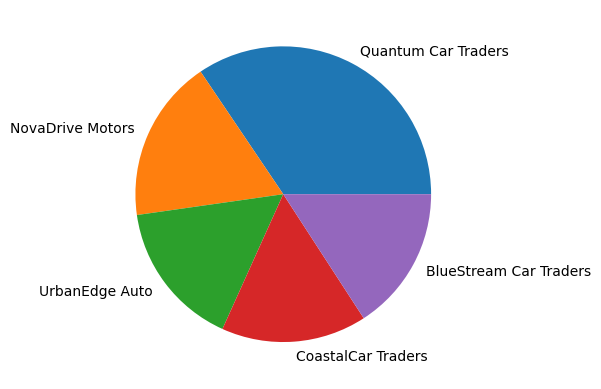

In [25]:
#Top 5 Dealers names By Total Cost
df_platform=df.groupby(['DEALER_NAME'], as_index=False)['TOTALCOST'].sum().sort_values(by='TOTALCOST', ascending=False).head(5)
plt.pie(df_platform['TOTALCOST'], labels=df_platform['DEALER_NAME'])

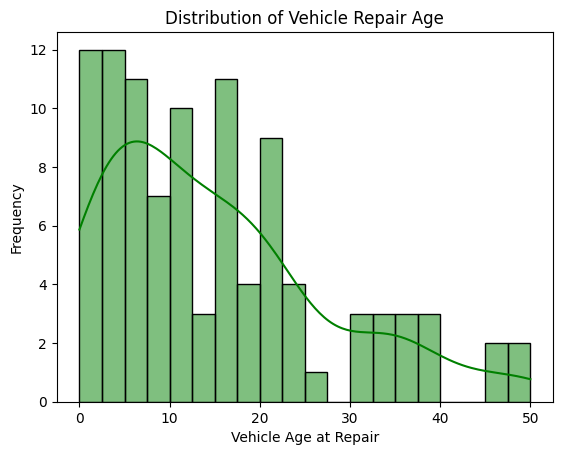

In [16]:
#Vehicle Repair Age
sns.histplot(df['REPAIR_AGE'].dropna(), bins=20, kde=True, color="green")
plt.title("Distribution of Vehicle Repair Age")
plt.xlabel("Vehicle Age at Repair")
plt.ylabel("Frequency")
plt.show()

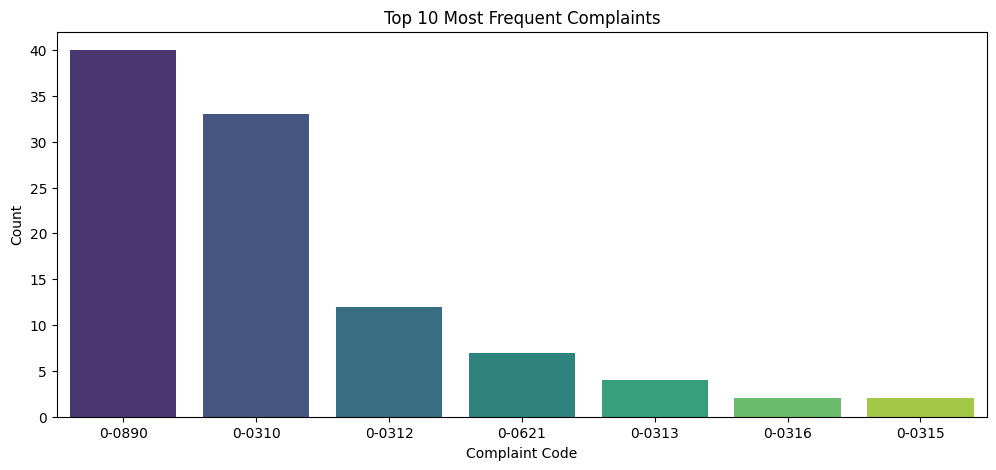

In [27]:
df_complaints = df['COMPLAINT_CD'].value_counts().nlargest(10)  # Top 10 complaints

plt.figure(figsize=(12, 5))
sns.barplot(x=df_complaints.index, y=df_complaints.values, palette='viridis')
plt.title("Top 10 Most Frequent Complaints")
plt.xlabel("Complaint Code")
plt.ylabel("Count")


plt.show()